# BIG MART SALE PREDICTION

# Train Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
train=pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
for k in train.columns:
  i = train[k].nunique()
  print(k,i)

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Exploratory data analysis

In [10]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
f=train.groupby('Outlet_Size')

In [12]:
df1=f.get_group('High')

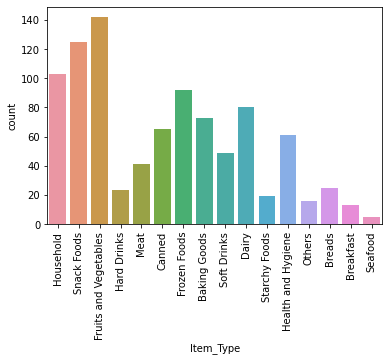

In [13]:
sns.countplot(x='Item_Type',data=df1)
plt.xticks(rotation=90)
plt.show()

In [14]:
df2=f.get_group('Medium')

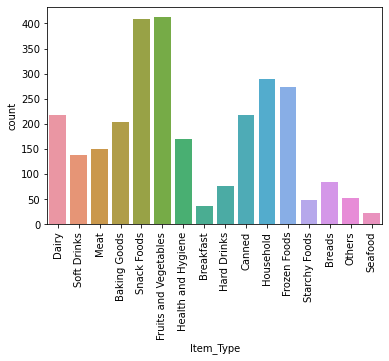

In [15]:
sns.countplot(x='Item_Type',data=df2)
plt.xticks(rotation=90)
plt.show()

In [16]:
df3=f.get_group('Small')

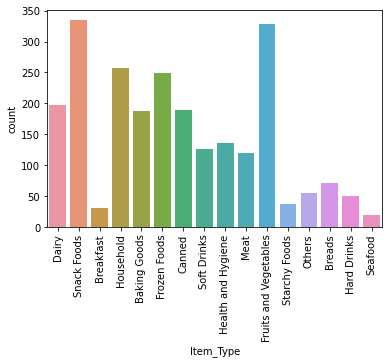

In [17]:
sns.countplot(x='Item_Type',data=df3)
plt.xticks(rotation=90)
plt.show()

Considering the outlet size High, Medium, Small,The given data shows that more sale in high and medium size is fruits and vegetables. In small size both fruits and vegetable and snack foods.

# Preprocessing

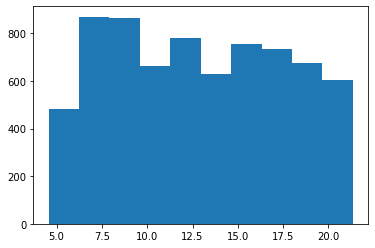

In [18]:
plt.hist(train['Item_Weight'])
plt.show()

In [19]:
train['Outlet_Size'].dtype

dtype('O')

# 1.Filling of missing 

In [20]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [21]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [23]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [24]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 2.Checking Correlation between variables

<AxesSubplot:>

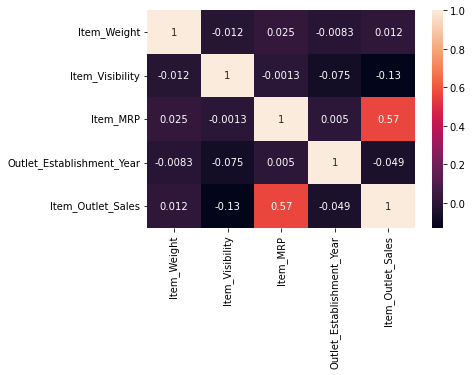

In [25]:
sns.heatmap(train.corr(),annot=True)

# To find Categorical columns

In [26]:
for i in train.columns:
  if train[i].dtypes == 'O':
    print (i)


Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [27]:
train['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [28]:
train['Item_Identifier'].nunique()

1559

This column don't have much importance so we need to drop that column

In [29]:
train=train.drop('Item_Identifier',axis=1)

In [30]:
train['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [31]:
train['Outlet_Identifier'].nunique()

10

In [32]:
train=train.drop('Outlet_Identifier',axis=1)

In [33]:
train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [34]:
train['Item_Fat_Content'].nunique()

5

In [35]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
ind1=train.loc[train['Item_Fat_Content'] == 'LF'].index

In [37]:
ind2=train.loc[train['Item_Fat_Content'] == 'Low Fat'].index

In [38]:
ind3=train.loc[train['Item_Fat_Content'] == 'low fat'].index

In [39]:
ind4=train.loc[train['Item_Fat_Content'] == 'Regular'].index

In [40]:
ind5=train.loc[train['Item_Fat_Content'] == 'reg'].index

In [41]:
train['Item_Fat_Content'][ind1] = 0

In [42]:
train['Item_Fat_Content'][ind2] = 0

In [43]:
train['Item_Fat_Content'][ind3] = 0

In [44]:
train['Item_Fat_Content'][ind4] = 1

In [45]:
train['Item_Fat_Content'][ind5] = 1

In [46]:
train['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: object

In [47]:
train['Item_Fat_Content']=train['Item_Fat_Content'].astype(int)

In [48]:
train['Item_Fat_Content'].dtypes

dtype('int32')

In [49]:
train['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [50]:
train['Item_Type'].nunique()

16

In [51]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [52]:
train['Outlet_Size'].nunique()

3

In [53]:

train['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [54]:
train['Outlet_Location_Type'].nunique()

3

In [55]:
train['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [56]:
train['Outlet_Type'].nunique()

4

We can do label encoding for some of the columns the above column

# Label Encoding

In [57]:
a=['Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in np.arange(len(a)):
    train[a[i]]=le.fit_transform(train[a[i]])

In [59]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,0,2,1,994.7052


In [60]:


train=pd.get_dummies(train)

In [61]:
train.shape

(8523, 25)

In [62]:
train['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [63]:
train['Outlet_Establishment_Year'].nunique()

9

In [64]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [65]:
ind1=train[train['Outlet_Establishment_Year']==1999].index

In [66]:
train['Outlet_Establishment_Year'][ind1]=0

In [67]:
ind2=train[train['Outlet_Establishment_Year']==2007].index

In [68]:
train['Outlet_Establishment_Year'][ind2]=1

In [69]:
ind3=train[train['Outlet_Establishment_Year']==1998].index

In [70]:
train['Outlet_Establishment_Year'][ind3]=2

In [71]:
ind4=train[train['Outlet_Establishment_Year']==1985].index

In [72]:
train['Outlet_Establishment_Year'][ind4]=3

In [73]:
ind5=train[train['Outlet_Establishment_Year']==1997].index

In [74]:
train['Outlet_Establishment_Year'][ind5]=4

In [75]:
ind6=train[train['Outlet_Establishment_Year']==2009].index

In [76]:
train['Outlet_Establishment_Year'][ind6]=5

In [77]:
ind7=train[train['Outlet_Establishment_Year']==2002].index

In [78]:
train['Outlet_Establishment_Year'][ind7]=6

In [79]:
ind8=train[train['Outlet_Establishment_Year']==1987].index

In [80]:
train['Outlet_Establishment_Year'][ind8]=7

In [81]:
ind9=train[train['Outlet_Establishment_Year']==2004].index

In [82]:
train['Outlet_Establishment_Year'][ind9]=8

In [83]:
train['Outlet_Establishment_Year'].unique()

array([0, 5, 2, 7, 3, 6, 1, 4, 8], dtype=int64)

In [84]:
train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,4.027103,1.170832,1.112871,1.201220,2181.288914,0.076030,...,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365
std,4.226124,0.477836,0.051598,62.275067,2.535890,0.600327,0.812757,0.796459,1706.499616,0.265061,...,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,2.000000,1.000000,0.000000,1.000000,834.247400,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,0.053931,143.012800,4.000000,1.000000,1.000000,1.000000,1794.331000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,1.000000,0.094585,185.643700,6.000000,2.000000,2.000000,1.000000,3101.296400,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,1.000000,0.328391,266.888400,8.000000,2.000000,2.000000,3.000000,13086.964800,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scalling

In [85]:
train[['Item_Weight','Item_Visibility','Item_MRP']]

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(train[['Item_Weight','Item_Visibility','Item_MRP']])

In [87]:
df=pd.DataFrame(scaled_data,columns= ['Item_Weight','Item_Visibility','Item_MRP'])

In [88]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-0.970732,1.747454
1,-1.641706,-0.908111,-1.489023
2,1.098554,-0.956917,0.010040
3,1.500838,-1.281758,0.660050
4,-0.929428,-1.281758,-1.399220


In [89]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,8.523000e+03,8.523000e+03,8.523000e+03
mean,3.127265e-16,-8.548444e-17,-1.644427e-16
std,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.964716e+00,-1.281758e+00,-1.761688e+00
25%,-8.395053e-01,-7.586531e-01,-7.574307e-01
50%,4.035383e-14,-2.364792e-01,3.243893e-02
75%,7.435985e-01,5.514755e-01,7.170372e-01
max,2.009608e+00,5.083050e+00,2.021724e+00


In [90]:
train[['Item_Weight','Item_Visibility','Item_MRP']]=df[['Item_Weight','Item_Visibility','Item_MRP']]

In [91]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.841872,0,-0.970732,1.747454,0,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,1,-0.908111,-1.489023,5,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,1.098554,0,-0.956917,0.010040,0,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,1.500838,1,-1.281758,0.660050,2,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.929428,0,-1.281758,-1.399220,7,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [92]:
train.shape

(8523, 25)

In [93]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

# Test Dataset

In [94]:
test=pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [95]:
test.shape

(5681, 11)

In [96]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [97]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Filling of missing values

In [98]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [99]:
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [100]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [101]:
test=test.drop('Item_Identifier',axis=1)

In [102]:
test=test.drop('Outlet_Identifier',axis=1)

In [103]:
test['Item_Fat_Content'].nunique()

5

# Encoding

In [104]:
ind1=test.loc[test['Item_Fat_Content'] == 'LF'].index

In [105]:
ind2=test.loc[test['Item_Fat_Content'] == 'Low Fat'].index

In [106]:
ind3=test.loc[test['Item_Fat_Content'] == 'low fat'].index

In [107]:
ind4=test.loc[test['Item_Fat_Content'] == 'Regular'].index

In [108]:
ind5=test.loc[test['Item_Fat_Content'] == 'reg'].index

In [109]:
test['Item_Fat_Content'][ind1] = 0
test['Item_Fat_Content'][ind2] = 0
test['Item_Fat_Content'][ind3] = 0
test['Item_Fat_Content'][ind4] = 1
test['Item_Fat_Content'][ind5] = 1

In [110]:
test['Item_Fat_Content']=test['Item_Fat_Content'].astype(int)

In [111]:
test['Item_Fat_Content']

0       0
1       1
2       0
3       0
4       1
       ..
5676    1
5677    1
5678    0
5679    1
5680    1
Name: Item_Fat_Content, Length: 5681, dtype: int32

In [112]:
a=['Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in np.arange(len(a)):
    test[a[i]]=le.fit_transform(test[a[i]])

In [114]:
test=pd.get_dummies(test)

In [115]:
test.shape

(5681, 24)

In [116]:
test['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [117]:
ind1=test[test['Outlet_Establishment_Year']==1999].index

In [118]:
test['Outlet_Establishment_Year'][ind1]=0

In [119]:
ind2=test[test['Outlet_Establishment_Year']==2007].index

In [120]:
test['Outlet_Establishment_Year'][ind2]=1

In [121]:
ind3=test[test['Outlet_Establishment_Year']==1998].index

In [122]:
test['Outlet_Establishment_Year'][ind3]=2

In [123]:
ind4=test[test['Outlet_Establishment_Year']==1985].index

In [124]:
test['Outlet_Establishment_Year'][ind4]=3

In [125]:
ind5=test[test['Outlet_Establishment_Year']==1997].index

In [126]:
test['Outlet_Establishment_Year'][ind5]=4

In [127]:
ind6=test[test['Outlet_Establishment_Year']==2009].index

In [128]:
test['Outlet_Establishment_Year'][ind6]=5

In [129]:
ind7=test[test['Outlet_Establishment_Year']==2002].index

In [130]:
test['Outlet_Establishment_Year'][ind7]=6

In [131]:
ind8=test[test['Outlet_Establishment_Year']==1987].index

In [132]:
test['Outlet_Establishment_Year'][ind8]=7

In [133]:
ind9=test[test['Outlet_Establishment_Year']==2004].index

In [134]:
test['Outlet_Establishment_Year'][ind9]=8

In [135]:
test['Outlet_Establishment_Year'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [136]:
test['Outlet_Establishment_Year'].dtype

dtype('int64')

# Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(test[['Item_Weight','Item_Visibility','Item_MRP']])

In [138]:
df=pd.DataFrame(scaled_data,columns= ['Item_Weight','Item_Visibility','Item_MRP'])

In [139]:
test[['Item_Weight','Item_Visibility','Item_MRP']]=df[['Item_Weight','Item_Visibility','Item_MRP']]

In [140]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1.897460e+00,0,-1.134077,-0.536555,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.035530e+00,1,-0.531850,-0.868937,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.486336e-01,0,0.661316,1.629848,2,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.267578e+00,0,-0.981416,0.226697,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-5.230960e-14,1,1.032540,1.508110,3,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
test.shape

(5681, 24)

In [142]:
test.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
count,5.681000e+03,5681.000000,5.681000e+03,5.681000e+03,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,-1.127616e-17,0.354339,-1.075046e-16,4.661920e-16,4.026756,1.170921,1.112832,1.201373,0.077099,0.029044,...,0.137476,0.026052,0.059497,0.112304,0.054744,0.019539,0.004401,0.138884,0.049463,0.021299
std,1.000088e+00,0.478355,1.000088e+00,1.000088e+00,2.535937,0.600328,0.812824,0.796740,0.266772,0.167945,...,0.344379,0.159303,0.236573,0.315768,0.227500,0.138421,0.066197,0.345856,0.216852,0.144392
min,-1.917783e+00,0.000000,-1.281690e+00,-1.764188e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.246845e-01,0.000000,-7.539239e-01,-7.541832e-01,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.230960e-14,0.000000,-2.249774e-01,6.344716e-03,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.431104e-01,1.000000,5.420473e-01,7.281662e-01,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.038809e+00,1.000000,5.033447e+00,2.031678e+00,8.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

In [143]:
x_train=train.drop(['Item_Outlet_Sales'],axis=1)

In [144]:
y_train=pd.DataFrame(train['Item_Outlet_Sales'])

In [145]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.841872,0,-0.970732,1.747454,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,1,-0.908111,-1.489023,5,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.098554,0,-0.956917,0.010040,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.500838,1,-1.281758,0.660050,2,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.929428,0,-1.281758,-1.399220,7,0,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,0,-0.181193,1.180783,7,0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,-1.059578,1,-0.371154,-0.527301,6,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,-0.534243,0,-0.599784,-0.897208,8,2,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,-1.336444,1,1.532880,-0.607977,5,1,2,2,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
y_train

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


# Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [148]:
lr_model=lr.fit(x_train,y_train )

In [149]:
x_test=test

In [150]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1.897460e+00,0,-1.134077,-0.536555,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.035530e+00,1,-0.531850,-0.868937,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.486336e-01,0,0.661316,1.629848,2,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.267578e+00,0,-0.981416,0.226697,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-5.230960e-14,1,1.032540,1.508110,3,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-5.172506e-01,1,-1.018333,0.004727,4,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5677,-1.200437e+00,1,1.508493,0.455014,5,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,1
5678,-6.350414e-01,0,0.153074,-0.360485,6,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5679,6.135406e-01,1,-1.281690,1.190844,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
y_pred=lr_model.predict(x_test)

In [152]:
y_pred

array([[1909.7310323 ],
       [1062.067905  ],
       [1774.03218213],
       ...,
       [1887.45263464],
       [3166.45150009],
       [1328.93830118]])

# Sample dataset

In [153]:
sample=pd.read_csv('sample_submission.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [154]:
#sample=sample.drop('1909.7310322982712',axis=1)

In [155]:
sample.shape

(5681, 3)

In [156]:
test.shape

(5681, 24)

In [157]:
y_prediction=pd.DataFrame(y_pred)

In [158]:
y_prediction

,0
0,1909.731032
1,1062.067905
2,1774.032182
3,2138.414925
4,4943.164473
...,...
5676,2325.684296
5677,3105.821821
5678,1887.452635
5679,3166.451500


In [159]:
sample['Item_Outlet_Sales']=y_prediction[0]

In [160]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1909.731032
1,FDW14,OUT017,1062.067905
2,NCN55,OUT010,1774.032182
3,FDQ58,OUT017,2138.414925
4,FDY38,OUT027,4943.164473
...,...,...,...
5676,FDB58,OUT046,2325.684296
5677,FDD47,OUT018,3105.821821
5678,NCO17,OUT045,1887.452635
5679,FDJ26,OUT017,3166.451500


In [161]:
sample.to_csv('submission.csv',index=False)

# Decision Tree

In [162]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [163]:
# Predicting the test set results
y_pred = regressor.predict(x_test)
y_pred


array([1706.50933444, 1349.51290433,  471.30684669, ..., 1925.55730694,
       3805.94860417, 1349.51290433])

In [164]:
tree_accuracy = round(regressor.score(x_train,y_train),2)
tree_accuracy

0.59

In [165]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
r2_score(y_train, regressor.predict(x_train))

0.5886809527214529

In [166]:
from sklearn import  metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1094


In [167]:
sample['Item_Outlet_Sales']=y_pred[0]

In [168]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1706.509334
1,FDW14,OUT017,1706.509334
2,NCN55,OUT010,1706.509334
3,FDQ58,OUT017,1706.509334
4,FDY38,OUT027,1706.509334
...,...,...,...
5676,FDB58,OUT046,1706.509334
5677,FDD47,OUT018,1706.509334
5678,NCO17,OUT045,1706.509334
5679,FDJ26,OUT017,1706.509334


In [169]:
sample.to_csv('submission1.csv',index=False)